# M507 Methods of Prediction


## Introduction

### Problem Statement

### Overview of Business Problem

## Importance of Solving Problem


## Data Collection Strategy

https://www.kaggle.com/datasets/camnugent/california-housing-prices

## Data Exploration

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)



data = pd.read_csv("/content/housing.csv")
print("Dataset loaded successfully!")
print(f"Shape: {data.shape}")
data.head()

Dataset loaded successfully!
Shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Check for missing values

missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0])
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(data['ocean_proximity'].value_counts())
print("\n")
print(data['ocean_proximity'].value_counts(normalize=True) * 100)

                Missing_Count  Percentage
total_bedrooms            207    1.002907
Number of duplicate rows: 0
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: proportion, dtype: float64


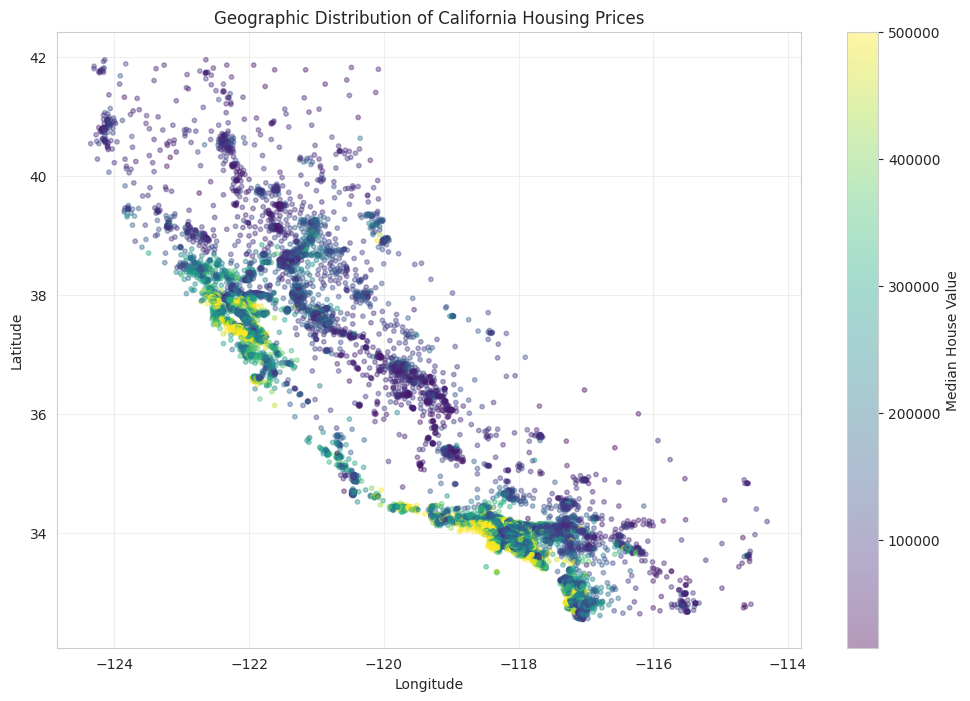

In [9]:
# Scatter plot showing geographic distribution with house values
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['longitude'], data['latitude'],
                     c=data['median_house_value'],
                     cmap='viridis',
                     alpha=0.4,
                     s=10)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of California Housing Prices')
plt.grid(True, alpha=0.3)
plt.show()

Correlation with Median House Value:


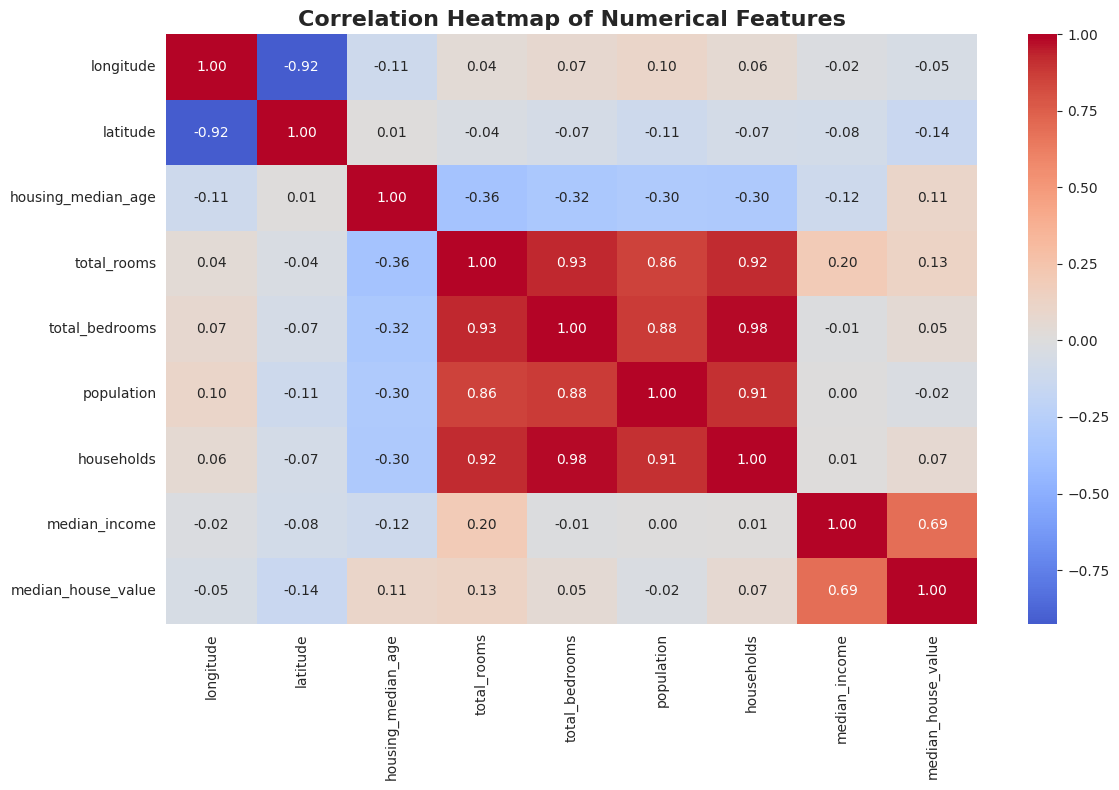

In [14]:
correlations = data.select_dtypes(include=[np.number]).corr()['median_house_value'].sort_values(ascending=False)
print("Correlation with Median House Value:")
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

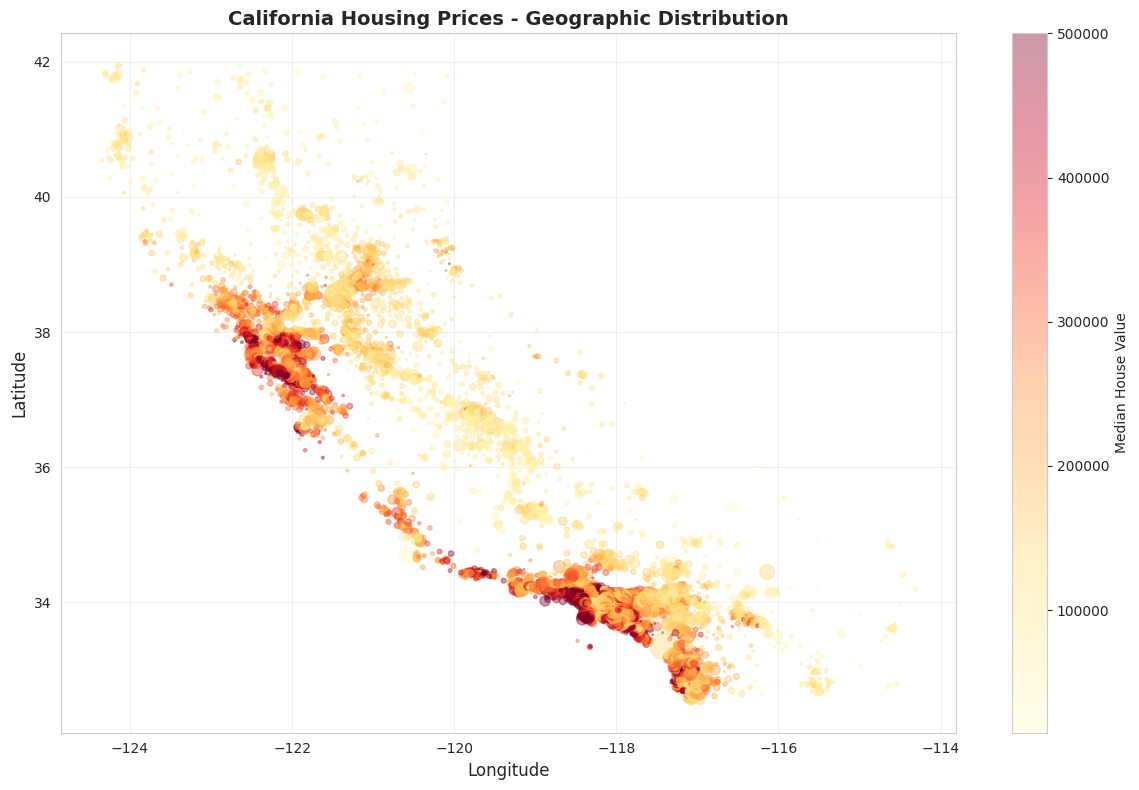

In [16]:
# Scatter plot showing house locations with price
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['longitude'], data['latitude'],
                     c=data['median_house_value'],
                     cmap='YlOrRd',
                     alpha=0.4,
                     s=data['population']/100)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('California Housing Prices - Geographic Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Data Preprocessing and Feature Engineering

In [20]:
# Create a copy for preprocessing
df = data.copy()
print(f"Working with a copy of the dataset")
print(f"Shape: {df.shape}")
# Check missing values again
print("Missing values before handling:")
print("="*50)
print(df.isnull().sum())
print("\n")

# Strategy: Fill total_bedrooms with median value
print("Strategy: Fill 'total_bedrooms' missing values with median")

Working with a copy of the dataset
Shape: (20640, 10)
Missing values before handling:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Strategy: Fill 'total_bedrooms' missing values with median


In [21]:
# Fill missing values in total_bedrooms with median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

print("Missing values after handling:")
print("="*50)
print(df.isnull().sum())

Missing values after handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [24]:
# Feature Engineering: Create rooms per household
df['rooms_per_household'] = df['total_rooms'] / df['households']
print("Created feature: rooms_per_household")
df[['total_rooms', 'households', 'rooms_per_household']].head()
# Feature Engineering: Create bedrooms per room
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
print("Created feature: bedrooms_per_room")
df[['total_bedrooms', 'total_rooms', 'bedrooms_per_room']].head()
# Feature Engineering: Create population per household
df['population_per_household'] = df['population'] / df['households']
print("Created feature: population_per_household")
df[['population', 'households', 'population_per_household']].head()

Created feature: rooms_per_household
Created feature: bedrooms_per_room
Created feature: population_per_household


,population,households,population_per_household
0,322.0,126.0,2.555556
1,2401.0,1138.0,2.109842
2,496.0,177.0,2.802260
3,558.0,219.0,2.547945
4,565.0,259.0,2.181467


In [25]:
# Display all new features
print("Dataset with new features:")
print("="*50)
print(f"Shape: {df.shape}")
print("\nNew columns:")
print(df.columns.tolist())

Dataset with new features:
Shape: (20640, 13)

New columns:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


## Model Training and Evaluation

In [28]:
# Separate features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Features shape: (20640, 12)
Target shape: (20640,)
Training set size: 16512
Test set size: 4128

Training set shape: (16512, 12)
Test set shape: (4128, 12)


In [29]:
# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

Categorical Features:
['ocean_proximity']


In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [33]:
# Numerical pipeline: impute missing values and scale
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

print("Numerical pipeline created:")
print(numerical_pipeline)

# Categorical pipeline: impute missing values and one-hot encode
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

print("Categorical pipeline created:")
print(categorical_pipeline)
# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

print("Full preprocessor created:")
print(preprocessor)

Numerical pipeline created:
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])
Categorical pipeline created:
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
Full preprocessor created:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_household', 'bedrooms_per_room',
                                  'population_per_househ

In [39]:
# Fit on training data and transform
X_train_processed = preprocessor.fit_transform(X_train)
print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Original training data shape: {X_train.shape}")

Processed training data shape: (16512, 16)
Original training data shape: (16512, 12)


In [40]:
# Get feature names after preprocessing
try:
    # Get numerical feature names
    num_feature_names = numerical_features

    # Get categorical feature names after one-hot encoding
    cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

    # Combine all feature names
    all_feature_names = num_feature_names + list(cat_feature_names)

    print(f"Total features after preprocessing: {len(all_feature_names)}")
    print("\nFeature names:")
    for i, name in enumerate(all_feature_names, 1):
        print(f"{i}. {name}")
except:
    print("Feature names extracted")

Total features after preprocessing: 16

Feature names:
1. longitude
2. latitude
3. housing_median_age
4. total_rooms
5. total_bedrooms
6. population
7. households
8. median_income
9. rooms_per_household
10. bedrooms_per_room
11. population_per_household
12. ocean_proximity_<1H OCEAN
13. ocean_proximity_INLAND
14. ocean_proximity_ISLAND
15. ocean_proximity_NEAR BAY
16. ocean_proximity_NEAR OCEAN


In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

In [44]:
# Split training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42
)

print(f"Final training set: {X_train_final.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Final training set: 13209 samples
Validation set: 3303 samples
Test set: 4128 samples


In [49]:
def build_model1(layers, optimizer, input_dim):
    """
    Build a simple Deep Neural Network
    """
    model = Sequential()

    # First hidden layer
    model.add(Dense(layers[0], activation='relu', input_dim=input_dim))

    # Additional hidden layers if specified
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))

    # Output layer
    model.add(Dense(1))

    # Compile model
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [50]:
def build_model2(layers, optimizer, input_dim, dropout_rate=0.2):
    """
    Build a Deep Neural Network with Dropout regularization
    """
    model = Sequential()

    # First hidden layer
    model.add(Dense(layers[0], activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))

    # Additional hidden layers if specified
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))

    # Compile model
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [51]:
# Model 1 configurations (Simple DNN) - Optimized
model1_configs = [
    {"layers": [32], "optimizer": Adam(0.01)},
    {"layers": [64], "optimizer": Adam(0.01)},
    {"layers": [32, 16], "optimizer": Adam(0.01)},
    {"layers": [64, 32], "optimizer": Adam(0.01)},
    {"layers": [128], "optimizer": Adam(0.005)},
    {"layers": [128, 64], "optimizer": Adam(0.005)},
    {"layers": [64], "optimizer": RMSprop(0.01)},
    {"layers": [64, 32], "optimizer": RMSprop(0.01)},
    {"layers": [128, 64, 32], "optimizer": Adam(0.01)},
    {"layers": [256], "optimizer": Adam(0.005)},
]

# Model 2 configurations (DNN with Dropout) - Optimized
model2_configs = [
    {"layers": [32], "optimizer": Adam(0.01), "dropout": 0.2},
    {"layers": [64], "optimizer": Adam(0.01), "dropout": 0.2},
    {"layers": [32, 16], "optimizer": Adam(0.01), "dropout": 0.2},
    {"layers": [64, 32], "optimizer": Adam(0.01), "dropout": 0.2},
    {"layers": [128], "optimizer": Adam(0.005), "dropout": 0.3},
    {"layers": [128, 64], "optimizer": Adam(0.005), "dropout": 0.3},
    {"layers": [64], "optimizer": RMSprop(0.01), "dropout": 0.2},
    {"layers": [64, 32], "optimizer": RMSprop(0.01), "dropout": 0.2},
    {"layers": [128, 64, 32], "optimizer": Adam(0.01), "dropout": 0.2},
    {"layers": [256], "optimizer": Adam(0.005), "dropout": 0.25},
]

print(f"Model 1 configurations: {len(model1_configs)}")
print(f"Model 2 configurations: {len(model2_configs)}")

Model 1 configurations: 10
Model 2 configurations: 10


In [52]:
# Store results for Model 1
results_model1 = []
input_dim = X_train_final.shape[1]

print("Training Model 1 (Simple DNN) - All Configurations")
print("="*70)

for idx, config in enumerate(model1_configs, 1):
    print(f"\nConfiguration {idx}/{len(model1_configs)}")
    print(f"Layers: {config['layers']}, Optimizer: {config['optimizer'].__class__.__name__}")

    start_time = time.time()

    # Build model
    model = build_model1(config['layers'], config['optimizer'], input_dim)

    # Train model with early stopping
    history = model.fit(
        X_train_final, y_train_final,
        validation_data=(X_val, y_val),
        epochs=30,  # Reduced from 50
        batch_size=64,  # Increased from 32 for faster training
        verbose=0
    )

    # Predict on validation set
    y_val_pred = model.predict(X_val, verbose=0).flatten()

    # Calculate metrics
    r2 = r2_score(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred)

    training_time = time.time() - start_time

    # Store results
    results_model1.append({
        'Config': idx,
        'Model': 'Simple DNN',
        'Layers': str(config['layers']),
        'Optimizer': config['optimizer'].__class__.__name__,
        'Learning_Rate': float(config['optimizer'].learning_rate.numpy()),
        'R2_Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Training_Time': training_time
    })

    print(f"R² Score: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, Time: {training_time:.2f}s")

print("\nModel 1 training completed!")

Training Model 1 (Simple DNN) - All Configurations

Configuration 1/10
Layers: [32], Optimizer: Adam
R² Score: 0.4642, RMSE: 85987.66, MAE: 61848.97, Time: 27.49s

Configuration 2/10
Layers: [64], Optimizer: Adam
R² Score: 0.6323, RMSE: 71237.92, MAE: 51601.79, Time: 20.96s

Configuration 3/10
Layers: [32, 16], Optimizer: Adam
R² Score: 0.6951, RMSE: 64866.26, MAE: 46214.10, Time: 22.30s

Configuration 4/10
Layers: [64, 32], Optimizer: Adam
R² Score: 0.6987, RMSE: 64485.75, MAE: 46142.11, Time: 21.92s

Configuration 5/10
Layers: [128], Optimizer: Adam
R² Score: 0.4446, RMSE: 87545.10, MAE: 62445.37, Time: 24.33s

Configuration 6/10
Layers: [128, 64], Optimizer: Adam
R² Score: 0.6962, RMSE: 64746.38, MAE: 46168.78, Time: 21.88s

Configuration 7/10
Layers: [64], Optimizer: RMSprop
R² Score: 0.6035, RMSE: 73969.20, MAE: 53512.05, Time: 19.60s

Configuration 8/10
Layers: [64, 32], Optimizer: RMSprop
R² Score: 0.6973, RMSE: 64629.52, MAE: 46015.69, Time: 21.39s

Configuration 9/10
Layers: [

In [53]:
# Store results for Model 2
results_model2 = []

print("\nTraining Model 2 (DNN with Dropout) - All Configurations")
print("="*70)

for idx, config in enumerate(model2_configs, 1):
    print(f"\nConfiguration {idx}/{len(model2_configs)}")
    print(f"Layers: {config['layers']}, Optimizer: {config['optimizer'].__class__.__name__}, Dropout: {config['dropout']}")

    start_time = time.time()

    # Build model
    model = build_model2(config['layers'], config['optimizer'], input_dim, config['dropout'])

    # Train model with early stopping
    history = model.fit(
        X_train_final, y_train_final,
        validation_data=(X_val, y_val),
        epochs=30,  # Reduced from 50
        batch_size=64,  # Increased from 32 for faster training
        verbose=0
    )

    # Predict on validation set
    y_val_pred = model.predict(X_val, verbose=0).flatten()

    # Calculate metrics
    r2 = r2_score(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred)

    training_time = time.time() - start_time

    # Store results
    results_model2.append({
        'Config': idx,
        'Model': 'DNN with Dropout',
        'Layers': str(config['layers']),
        'Optimizer': config['optimizer'].__class__.__name__,
        'Learning_Rate': float(config['optimizer'].learning_rate.numpy()),
        'Dropout': config['dropout'],
        'R2_Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Training_Time': training_time
    })

    print(f"R² Score: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, Time: {training_time:.2f}s")

print("\nModel 2 training completed!")


Training Model 2 (DNN with Dropout) - All Configurations

Configuration 1/10
Layers: [32], Optimizer: Adam, Dropout: 0.2
R² Score: 0.4914, RMSE: 83780.59, MAE: 60586.30, Time: 22.23s

Configuration 2/10
Layers: [64], Optimizer: Adam, Dropout: 0.2
R² Score: 0.6387, RMSE: 70611.42, MAE: 51092.47, Time: 21.35s

Configuration 3/10
Layers: [32, 16], Optimizer: Adam, Dropout: 0.2
R² Score: 0.6906, RMSE: 65347.86, MAE: 46408.89, Time: 23.64s

Configuration 4/10
Layers: [64, 32], Optimizer: Adam, Dropout: 0.2
R² Score: 0.6992, RMSE: 64426.97, MAE: 45461.12, Time: 24.39s

Configuration 5/10
Layers: [128], Optimizer: Adam, Dropout: 0.3
R² Score: 0.4156, RMSE: 89803.33, MAE: 63965.78, Time: 26.36s

Configuration 6/10
Layers: [128, 64], Optimizer: Adam, Dropout: 0.3
R² Score: 0.6957, RMSE: 64796.90, MAE: 45956.66, Time: 32.16s

Configuration 7/10
Layers: [64], Optimizer: RMSprop, Dropout: 0.2
R² Score: 0.5990, RMSE: 74389.22, MAE: 53487.06, Time: 23.13s

Configuration 8/10
Layers: [64, 32], Optim

## Model Assessment

In [54]:
# Combine results from both models
all_results = results_model1 + results_model2

# Create DataFrame
results_df = pd.DataFrame(all_results)

print(f"Total experiments conducted: {len(results_df)}")
print("\nResults DataFrame shape:", results_df.shape)
results_df.head(10)

Total experiments conducted: 20

Results DataFrame shape: (20, 10)


,Config,Model,Layers,Optimizer,Learning_Rate,R2_Score,RMSE,MAE,Training_Time,Dropout
0,1,Simple DNN,[32],Adam,0.010,0.464207,85987.660311,61848.972533,27.488007,NaN
1,2,Simple DNN,[64],Adam,0.010,0.632255,71237.917568,51601.785861,20.964360,NaN
2,3,Simple DNN,"[32, 16]",Adam,0.010,0.695096,64866.260499,46214.098670,22.304702,NaN
3,4,Simple DNN,"[64, 32]",Adam,0.010,0.698663,64485.751303,46142.105885,21.915500,NaN
4,5,Simple DNN,[128],Adam,0.005,0.444622,87545.102259,62445.367769,24.333191,NaN
5,6,Simple DNN,"[128, 64]",Adam,0.005,0.696222,64746.377957,46168.781290,21.883020,NaN
6,7,Simple DNN,[64],RMSprop,0.010,0.603515,73969.201639,53512.051254,19.604883,NaN
7,8,Simple DNN,"[64, 32]",RMSprop,0.010,0.697318,64629.517500,46015.692005,21.390926,NaN
8,9,Simple DNN,"[128, 64, 32]",Adam,0.010,0.749839,58755.361559,40432.330973,23.229808,NaN
9,10,Simple DNN,[256],Adam,0.005,0.643915,70099.411505,50911.189964,21.278773,NaN


In [55]:
# Display all experimental results sorted by R2 Score
results_sorted = results_df.sort_values('R2_Score', ascending=False)

print("EXPERIMENTAL RESULTS - ALL CONFIGURATIONS")
print("="*100)
print(results_sorted.to_string(index=False))

EXPERIMENTAL RESULTS - ALL CONFIGURATIONS
 Config            Model        Layers Optimizer  Learning_Rate  R2_Score         RMSE          MAE  Training_Time  Dropout
      9       Simple DNN [128, 64, 32]      Adam          0.010  0.749839 58755.361559 40432.330973      23.229808      NaN
      4 DNN with Dropout      [64, 32]      Adam          0.010  0.699212 64426.969729 45461.117884      24.387009     0.20
      9 DNN with Dropout [128, 64, 32]      Adam          0.010  0.699047 64444.615838 45589.320380      25.235724     0.20
      4       Simple DNN      [64, 32]      Adam          0.010  0.698663 64485.751303 46142.105885      21.915500      NaN
      8 DNN with Dropout      [64, 32]   RMSprop          0.010  0.698200 64535.323423 45707.273603      22.851941     0.20
      8       Simple DNN      [64, 32]   RMSprop          0.010  0.697318 64629.517500 46015.692005      21.390926      NaN
      6       Simple DNN     [128, 64]      Adam          0.005  0.696222 64746.377957 461

In [56]:
# Summary statistics by model type
print("\nSUMMARY STATISTICS BY MODEL TYPE")
print("="*70)

summary = results_df.groupby('Model').agg({
    'R2_Score': ['mean', 'std', 'min', 'max'],
    'RMSE': ['mean', 'std', 'min', 'max'],
    'MAE': ['mean', 'std', 'min', 'max'],
    'Training_Time': ['mean', 'sum']
}).round(4)

print(summary)


SUMMARY STATISTICS BY MODEL TYPE
                 R2_Score                                RMSE             \
                     mean     std     min     max        mean        std   
Model                                                                      
DNN with Dropout   0.6262  0.0990  0.4156  0.6992  71317.7781  8981.0493   
Simple DNN         0.6326  0.1027  0.4446  0.7498  70632.2562  9524.1333   

                                                 MAE                         \
                         min         max        mean        std         min   
Model                                                                         
DNN with Dropout  64426.9697  89803.3256  50964.0483  6673.4940  45461.1179   
Simple DNN        58755.3616  87545.1023  50529.2376  7145.5077  40432.3310   

                             Training_Time            
                         max          mean       sum  
Model                                                 
DNN with Dropout  63965.

In [57]:
# Display top 5 configurations
print("\nTOP 5 CONFIGURATIONS (Based on R² Score)")
print("="*100)

top_5 = results_sorted.head(5)
for idx, row in top_5.iterrows():
    print(f"\nRank {list(top_5.index).index(idx) + 1}:")
    print(f"  Model: {row['Model']}")
    print(f"  Layers: {row['Layers']}")
    print(f"  Optimizer: {row['Optimizer']} (LR: {row['Learning_Rate']})")
    if 'Dropout' in row and pd.notna(row['Dropout']):
        print(f"  Dropout: {row['Dropout']}")
    print(f"  R² Score: {row['R2_Score']:.4f}")
    print(f"  RMSE: {row['RMSE']:.2f}")
    print(f"  MAE: {row['MAE']:.2f}")
    print(f"  Training Time: {row['Training_Time']:.2f}s")


TOP 5 CONFIGURATIONS (Based on R² Score)

Rank 1:
  Model: Simple DNN
  Layers: [128, 64, 32]
  Optimizer: Adam (LR: 0.009999999776482582)
  R² Score: 0.7498
  RMSE: 58755.36
  MAE: 40432.33
  Training Time: 23.23s

Rank 2:
  Model: DNN with Dropout
  Layers: [64, 32]
  Optimizer: Adam (LR: 0.009999999776482582)
  Dropout: 0.2
  R² Score: 0.6992
  RMSE: 64426.97
  MAE: 45461.12
  Training Time: 24.39s

Rank 3:
  Model: DNN with Dropout
  Layers: [128, 64, 32]
  Optimizer: Adam (LR: 0.009999999776482582)
  Dropout: 0.2
  R² Score: 0.6990
  RMSE: 64444.62
  MAE: 45589.32
  Training Time: 25.24s

Rank 4:
  Model: Simple DNN
  Layers: [64, 32]
  Optimizer: Adam (LR: 0.009999999776482582)
  R² Score: 0.6987
  RMSE: 64485.75
  MAE: 46142.11
  Training Time: 21.92s

Rank 5:
  Model: DNN with Dropout
  Layers: [64, 32]
  Optimizer: RMSprop (LR: 0.009999999776482582)
  Dropout: 0.2
  R² Score: 0.6982
  RMSE: 64535.32
  MAE: 45707.27
  Training Time: 22.85s


In [58]:
# Get the best configuration
best_config = results_sorted.iloc[0]

print("BEST MODEL CONFIGURATION")
print("="*70)
print(f"Model Type: {best_config['Model']}")
print(f"Configuration: {best_config['Config']}")
print(f"Layers: {best_config['Layers']}")
print(f"Optimizer: {best_config['Optimizer']}")
print(f"Learning Rate: {best_config['Learning_Rate']}")
if 'Dropout' in best_config and pd.notna(best_config['Dropout']):
    print(f"Dropout Rate: {best_config['Dropout']}")
print(f"\nValidation Performance:")
print(f"  R² Score: {best_config['R2_Score']:.4f}")
print(f"  RMSE: {best_config['RMSE']:.2f}")
print(f"  MAE: {best_config['MAE']:.2f}")
print(f"  Training Time: {best_config['Training_Time']:.2f} seconds")

BEST MODEL CONFIGURATION
Model Type: Simple DNN
Configuration: 9
Layers: [128, 64, 32]
Optimizer: Adam
Learning Rate: 0.009999999776482582

Validation Performance:
  R² Score: 0.7498
  RMSE: 58755.36
  MAE: 40432.33
  Training Time: 23.23 seconds


## Final Discussion

## Conclusion

## Bibliography

Abedi, V., Avula, V., Chaudhary, D., Shahjouei, S., Khan, A., Griessenauer, C.J., Li, J. and Zand, R. (2021). Prediction of long-term stroke recurrence using machine learning models. Journal of Clinical Medicine, 10(6), 1286.


Fernandez-Lozano, C., Gestal, M., Munteanu, C.R., Dorado, J. and Pazos, A. (2021). Random forest-based prediction of stroke outcome. Scientific Reports, 11, 10071.

MacEachern, S.J. and Forkert, N.D. (2021). Machine learning for precision medicine. Genome, 64(4), 416-425.



Sarker, I.H. (2021). Machine learning: Algorithms, real-world applications and research directions. SN Computer Science, 2, 160.
